# WeatherPy

## Analysis
1. There is a strong realtionship between a city's latitude and their max temperature. Not surprisingly, the cities in the southern hemisphere have higher temps than those in the northern hemisphere. There are some cities near the equator in the northern hemisphere that have higher temperatures as well but it tapers off when you get above 20 degrees latitude.
<br>
2. There is a weak to no correlation between the city's latitude and their humidity levels, cloudiness, and wind speed.
    - The majority of the cities in my data set have a humidity level over 60%. 
    - The cities in my data set seem to have cloudiness clusters at 0%, 20%, 40%, ~75%, 90%, and 100%; however there was no correlation between these percentages and the latitudes.
    - The majority of cities in my data set have wind speeds at or below 15 MPH.
<br>
3. When we split the data set into the northern and southern hemispheres, the correlations did not change. There was an obvious difference in the latitude vs. max temp linear regression plots between the two hemispheres but the other three graphs still showed no correlation between the city's latitude and their humidity levels, cloudiness, and wind speed.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [23]:
# create empty lists
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
record_counter = 0
set_counter = 1

print("Beginning Data Retrieval")
print("-----------------------------")

# set base url
base_url=f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

# extract information for the cities
for city in cities:
    url = base_url + city
    response = requests.get(url).json()
    try:
        city_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        if record_counter == 50:
            record_counter = 1
            set_counter +=1
        else:
            record_counter +=1   
        print(f"Processing Record {record_counter} of Set {set_counter}: {city}")
    except KeyError:
        print("City not found. Skipping...")    
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1: ojinaga
Processing Record 2 of Set 1: provideniya
Processing Record 3 of Set 1: porto novo
City not found. Skipping...
Processing Record 4 of Set 1: marawi
City not found. Skipping...
Processing Record 5 of Set 1: iqaluit
Processing Record 6 of Set 1: nybro
Processing Record 7 of Set 1: busselton
Processing Record 8 of Set 1: albany
Processing Record 9 of Set 1: kenai
Processing Record 10 of Set 1: punta arenas
Processing Record 11 of Set 1: puerto ayora
Processing Record 12 of Set 1: nikolskoye
Processing Record 13 of Set 1: khalkhal
Processing Record 14 of Set 1: cairns
Processing Record 15 of Set 1: havre-saint-pierre
Processing Record 16 of Set 1: arraial do cabo
Processing Record 17 of Set 1: butaritari
Processing Record 18 of Set 1: sayyan
Processing Record 19 of Set 1: esperance
Processing Record 20 of Set 1: port alfred
Processing Record 21 of Set 1: nouadhibou
Processing Record 22 of Set 1: ma

Processing Record 43 of Set 4: ahipara
Processing Record 44 of Set 4: zhigalovo
City not found. Skipping...
Processing Record 45 of Set 4: axim
Processing Record 46 of Set 4: shizunai
Processing Record 47 of Set 4: ribeira grande
Processing Record 48 of Set 4: castro
Processing Record 49 of Set 4: bongor
Processing Record 50 of Set 4: verkhnyaya toyma
Processing Record 1 of Set 5: carrollton
Processing Record 2 of Set 5: bethel park
Processing Record 3 of Set 5: mahebourg
City not found. Skipping...
Processing Record 4 of Set 5: havelock
Processing Record 5 of Set 5: ayagoz
Processing Record 6 of Set 5: beringovskiy
Processing Record 7 of Set 5: vanimo
Processing Record 8 of Set 5: escanaba
Processing Record 9 of Set 5: jalu
City not found. Skipping...
Processing Record 10 of Set 5: lebu
Processing Record 11 of Set 5: teseney
Processing Record 12 of Set 5: narsaq
Processing Record 13 of Set 5: sulangan
Processing Record 14 of Set 5: ngawen
City not found. Skipping...
Processing Record 

Processing Record 35 of Set 8: brezovo
Processing Record 36 of Set 8: vila velha
Processing Record 37 of Set 8: cabrobo
Processing Record 38 of Set 8: kavaratti
Processing Record 39 of Set 8: price
City not found. Skipping...
Processing Record 40 of Set 8: mansa
Processing Record 41 of Set 8: gomel
Processing Record 42 of Set 8: muroto
Processing Record 43 of Set 8: hailar
Processing Record 44 of Set 8: kutum
Processing Record 45 of Set 8: roald
Processing Record 46 of Set 8: wanganui
Processing Record 47 of Set 8: cauquenes
Processing Record 48 of Set 8: necochea
Processing Record 49 of Set 8: shumikha
Processing Record 50 of Set 8: koungheul
Processing Record 1 of Set 9: inirida
Processing Record 2 of Set 9: arman
Processing Record 3 of Set 9: nishihara
Processing Record 4 of Set 9: teguldet
Processing Record 5 of Set 9: vostok
Processing Record 6 of Set 9: berbera
Processing Record 7 of Set 9: piacabucu
Processing Record 8 of Set 9: yerbogachen
Processing Record 9 of Set 9: porto sa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
# create new df
cities_df = pd.DataFrame({
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_speed_list,
    "Country": country_list,
    "Date": date_list})

# display the new dataframe
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ojinaga,29.5667,-104.4167,71.60,16,1,3.44,MX,1612563006
1,Provideniya,64.3833,-173.3000,7.27,90,100,14.41,RU,1612562552
2,Porto-Novo,6.4965,2.6036,86.00,79,40,12.66,BJ,1612562619
3,Marawi,7.9986,124.2928,71.01,91,89,7.00,PH,1612563007
4,Iqaluit,63.7506,-68.5145,23.00,80,75,18.41,CA,1612562549
...,...,...,...,...,...,...,...,...,...
542,Gravdal,68.1214,13.5031,30.20,86,40,6.91,NO,1612563137
543,Tual,-5.6667,132.7500,83.62,75,99,20.15,ID,1612562637
544,Schwarzenberg,50.5500,12.7833,33.01,95,100,3.00,DE,1612563138
545,Mnogovershinnyy,53.9353,139.9242,-14.62,91,100,4.03,RU,1612563138


## Inspect data and remove cities where the humidity > 100%.

In [25]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,19.555082,23.204253,51.164278,72.965265,52.908592,8.324369,1.612563e+09
std,32.517490,91.613811,32.150200,20.687025,39.811677,5.681156,2.435804e+02
min,-54.800000,-175.200000,-42.570000,11.000000,0.000000,0.110000,1.612562e+09
25%,-5.858350,-60.598550,33.155000,65.000000,6.000000,3.440000,1.612563e+09
50%,20.894700,26.687600,63.590000,78.000000,68.000000,6.910000,1.612563e+09
75%,47.391650,109.921150,77.000000,88.000000,91.000000,11.500000,1.612563e+09
max,78.218600,179.316700,97.250000,100.000000,100.000000,31.340000,1.612563e+09


In [79]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = cities_df.loc[cities_df["Humidity"] >= 101]
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [98]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data = cities_df.drop(cities_df[cities_df["Humidity"] >= 101].index, inplace=False) 

# export new data into a .csv file
clean_city_data.to_csv("../output_data/cities.csv", index=None, header=True)

# display new data set with all cities <= 100 degrees humidity
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ojinaga,29.5667,-104.4167,71.60,16,1,3.44,MX,1612563006
1,Provideniya,64.3833,-173.3000,7.27,90,100,14.41,RU,1612562552
2,Porto-Novo,6.4965,2.6036,86.00,79,40,12.66,BJ,1612562619
3,Marawi,7.9986,124.2928,71.01,91,89,7.00,PH,1612563007
4,Iqaluit,63.7506,-68.5145,23.00,80,75,18.41,CA,1612562549
...,...,...,...,...,...,...,...,...,...
542,Gravdal,68.1214,13.5031,30.20,86,40,6.91,NO,1612563137
543,Tual,-5.6667,132.7500,83.62,75,99,20.15,ID,1612562637
544,Schwarzenberg,50.5500,12.7833,33.01,95,100,3.00,DE,1612563138
545,Mnogovershinnyy,53.9353,139.9242,-14.62,91,100,4.03,RU,1612563138


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

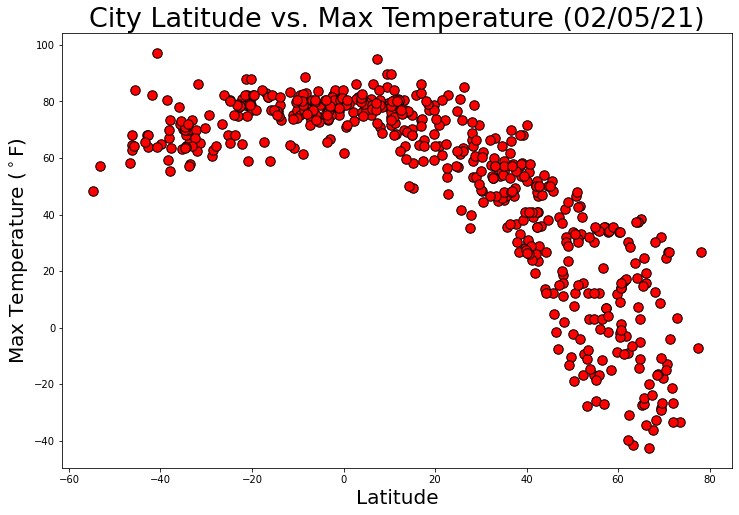

In [82]:
# create a scatter plot to show relationship between lattitude and max temperature
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], 
            marker="o", s=90, c="r", edgecolor="k")

# add labels for readability
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Max Temperature ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature ($^\circ$F)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig1.png")

plt.show()

### Analysis of Latitude vs. Max Temp Plot
- This graph shows the relationship between a city's latitude and their max temperature.
- The result shows what we all know and expect in that cities in the southern hemisphere and cities (both hemispheres) that are close to the equator have higher max temperatures than cities farther north of the equator.

## Latitude vs. Humidity Plot

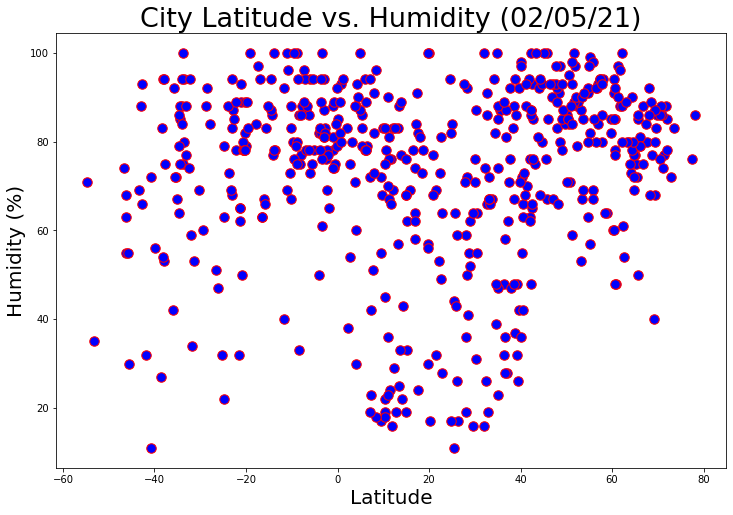

In [84]:
# create a scatter plot to show relationship between lattitude and humidity
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], 
            marker="o", s=90, c="b", edgecolor="r")

# add labels for readability
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Humidity ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig2.png")

plt.show()

### Analysis of Latitude vs. Humidity Plot
- This graph shows the relationship between a city's latitude and their humidity levels.

- The analysis of this graph does not give us a great definitive correlation between a city's latitude and their humidity levels.

- When I ran this last data set, there was a small cluster of cities between 40-70 degrees latitude that had lower humidity rates, however this was not the case in some of my previous data sets.

## Latitude vs. Cloudiness Plot

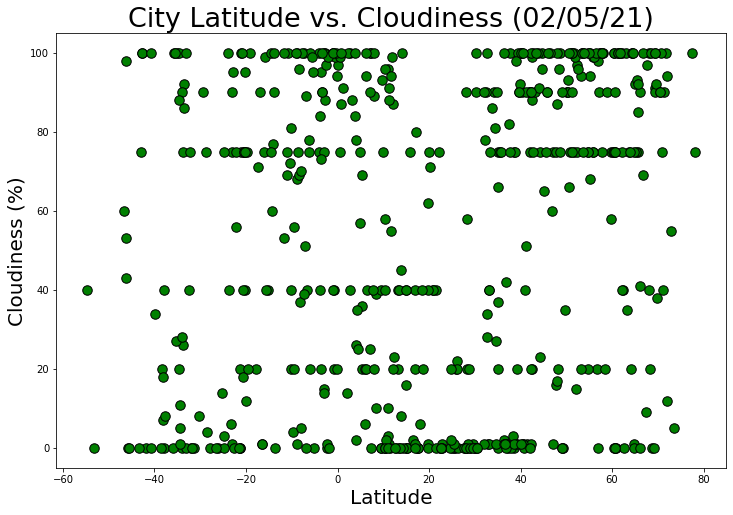

In [86]:
# create a scatter plot to show relationship between lattitude and cloudiness
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
fig1, ax1 = plt.subplots(figsize=(12, 8))

# add labels for readability
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], 
            marker="o", s=90, c="g", edgecolor="k")
plt.title(f"City Latitude vs. Cloudiness ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig3.png")

plt.show()

### Analysis of Latitude vs. Cloudiness
- This graph shows the relationship between a city's latitude and their percentage of cloudy days.

- The results of this graph do not show any correlation between a city's latitude and how many cloudy days they have.

## Latitude vs. Wind Speed Plot

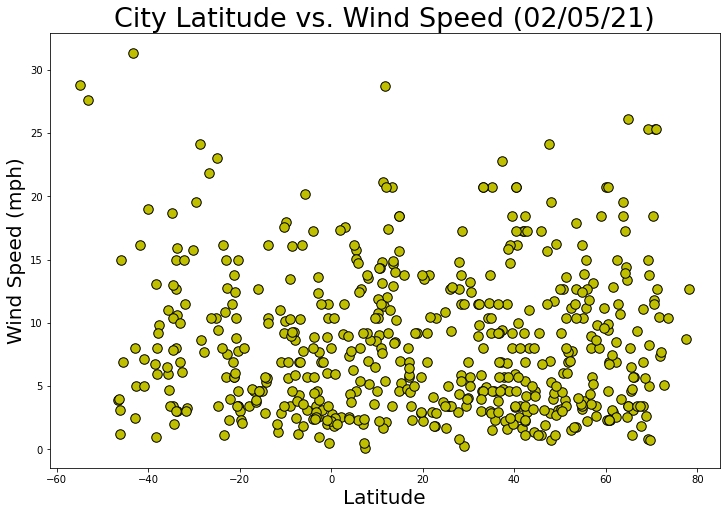

In [87]:
# create a scatter plot to show relationship between lattitude and wind speed
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
fig1, ax1 = plt.subplots(figsize=(12, 8))

# add labels for readability
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"],
            marker="o", s=90, c="y", edgecolor="k")
plt.title(f"City Latitude vs. Wind Speed ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig4.png")

plt.show()

### Analysis of Latitude vs. Wind Speed Plot
- This graph shows the relationship between a city's latitude and wind speeds.

- Looking at the graph, there does not seem to be a relationship between the city's latitude and wind speed.

## Linear Regression

In [88]:
# seperate data by northern and southern hemispheres
n_hem = clean_city_data.loc[clean_city_data["Lat"] >= 0]
s_hem = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8683043389508364


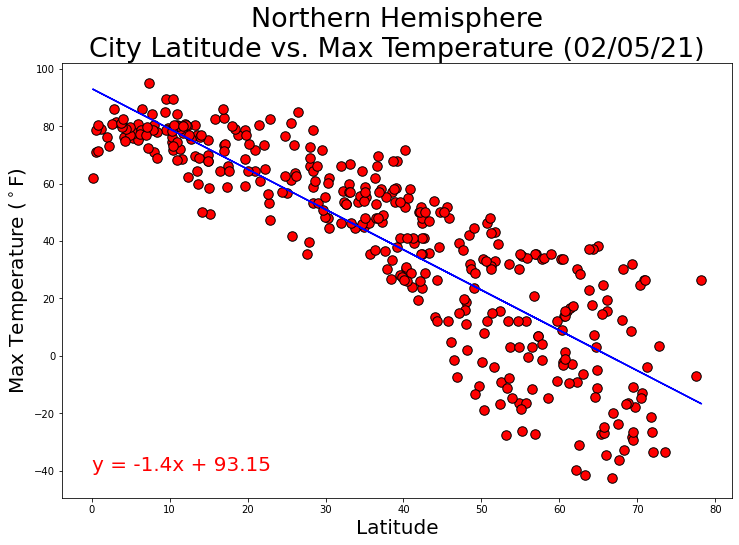

In [89]:
# create a scatter plot to show relationship between lattitude and max temp in the northern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="r", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "b-")

# print equation in graph
plt.annotate(line_eq, (0,-40), fontsize=20, color="r")

# add labels for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Max Temperature ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature ($^\circ$F)", fontsize=20)

print(f"The r-value is: {rvalue}")

# save figure as a .png file
plt.savefig("../output_data/LinRegress1.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5243434756894667


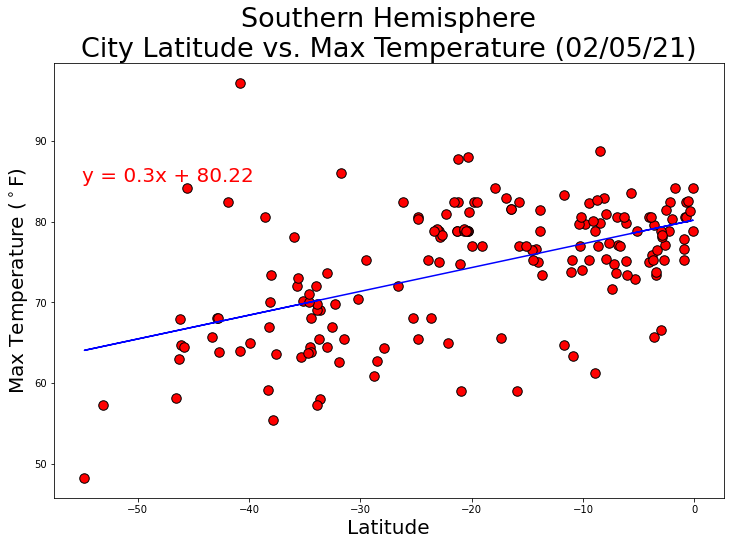

In [90]:
# create a scatter plot to show relationship between lattitude and max temp in the southern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="r", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "b-")

# print equation in graph
plt.annotate(line_eq, (-55,85), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Max Temperature ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature ($^\circ$F)", fontsize=20)

print(f"The r-value is: {rvalue}")

# save figure as a .png file
plt.savefig("../output_data/LinRegress2.png")

plt.show()

### Analysis of Latitude vs. Max Temperature broken up into the northern and southern hemispheres.
- The northern hemisphere shows a strong correlation between the latitude and max temperature. The visual data on the graph shows that the higher the latitude the lower the max temperatures are and the r-value of -.86 confirms the strong correlation between our data points.

- The southern hemisphere on the other hand does not show nearly as strong of a relationship between the data points. The points on the graph are pretty spread out and the r-value of .52 confirms that there is a weaker correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3104047423399794


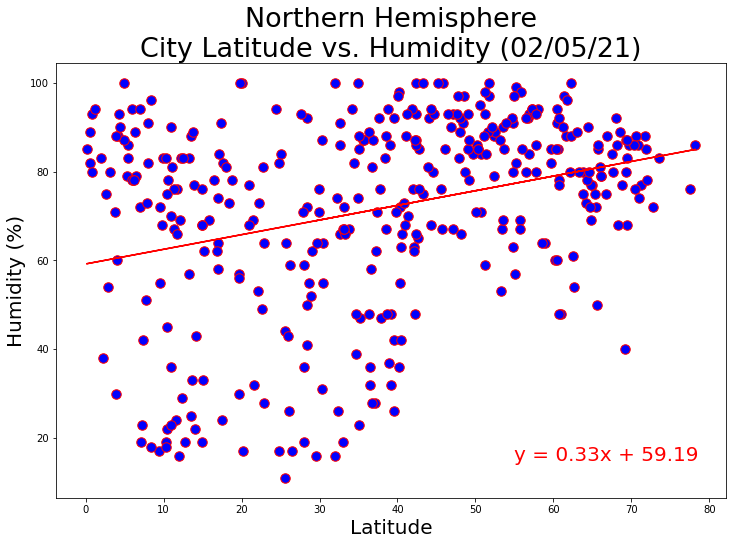

In [91]:
# create a scatter plot to show relationship between lattitude and humidity in the northern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="b", edgecolor="r")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (55,15), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Humidity ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

# save figure as a .png file
plt.savefig("../output_data/LinRegress3.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3341638482151563


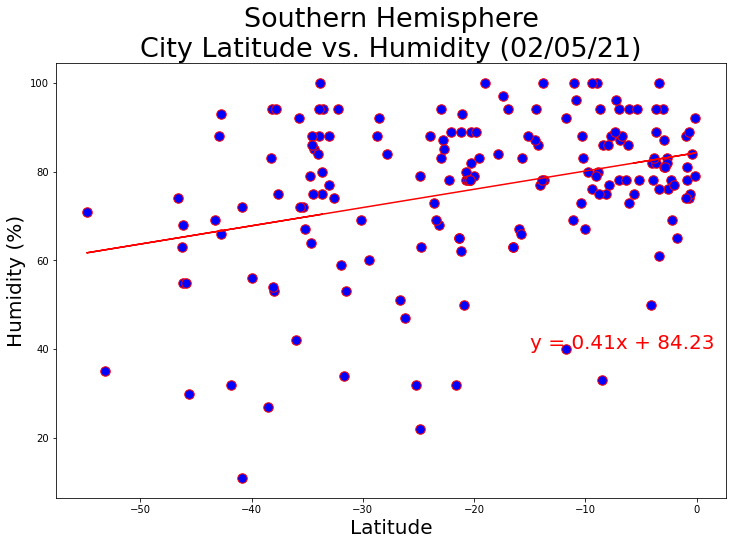

In [92]:
# create a scatter plot to show relationship between lattitude and humidity in the southern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="b", edgecolor="r")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (-15,40), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Humidity ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

# save figure as a .png file
plt.savefig("../output_data/LinRegress4.png")

plt.show()

### Analysis of Latitude vs. Humidity broken up into the northern and southern hemispheres.
- The data in the northern hemisphere graphs does shows a weak correlation between the city's latitude and its humidity levels. The r-value of .31 supports that as well.
- The southern hemisphere has almost the same relationship and r-value. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.29853445541405876


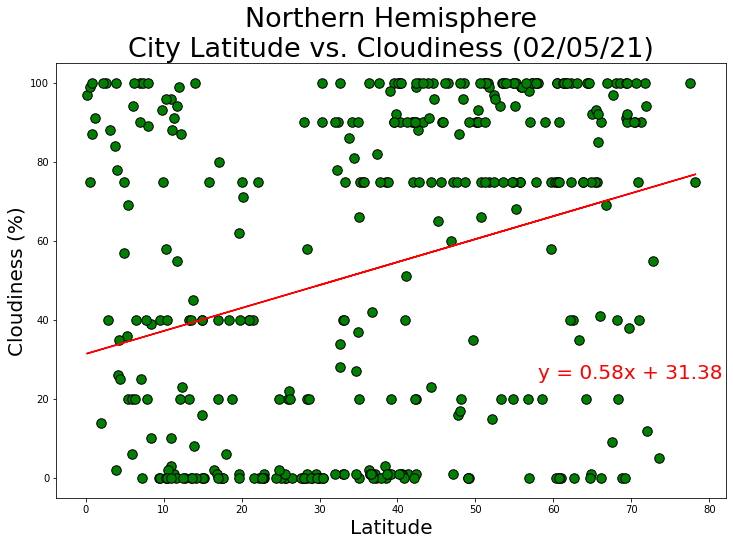

In [93]:
# create a scatter plot to show relationship between lattitude and cloudiness in the northern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="g", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (58,25), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Cloudiness ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

# save figure as a .png file
plt.savefig("../output_data/LinRegress5.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.26548524236148535


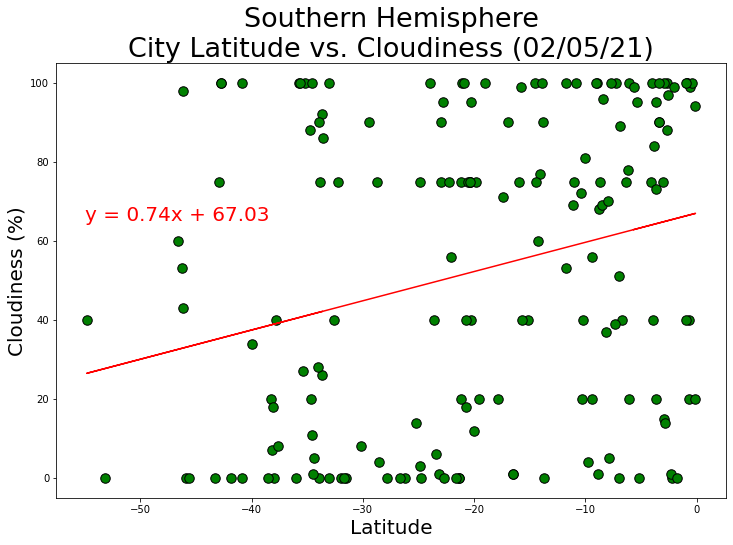

In [94]:
# create a scatter plot to show relationship between lattitude and cloudiness in the southern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="g", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (-55,65), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Cloudiness ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

# save figure as a .png file
plt.savefig("../output_data/LinRegress6.png")

plt.show()

### Analysis of Latitude vs. Percentage of Cloudy Days broken up into the northern and southern hemispheres.
- The graph for the northern hemisphere is showing a weak correlation between the city’s latitudes and they percentage of cloudy days they see. The r-value of .29 supports that this is a weak correlation between our data points.
- The graph for the southern hemisphere shows a weaker correlation between the data points. The r-value for this graph is .26 which means there is a weak, to no correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.013527267141843671


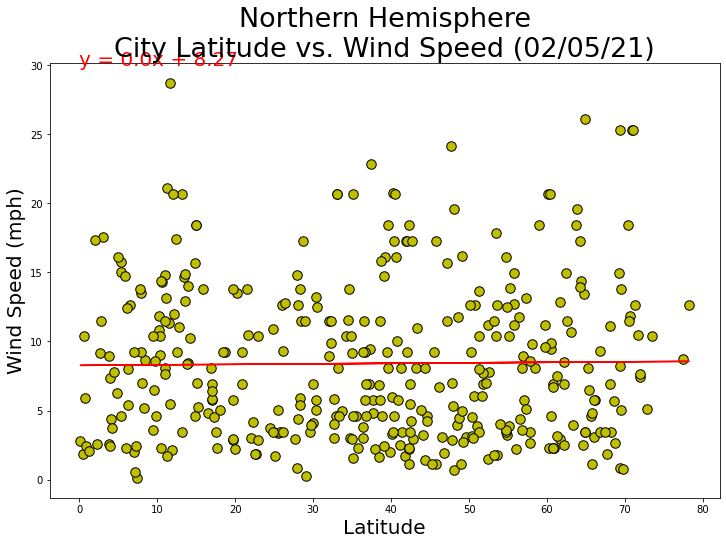

In [95]:
# create a scatter plot to show relationship between lattitude and wind speed in the northern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="y", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (0,30), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Wind Speed ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=20)

print(f"The r-value is: {rvalue}")

# save figure as a .png file
plt.savefig("../output_data/LinRegress7.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2627955942763418


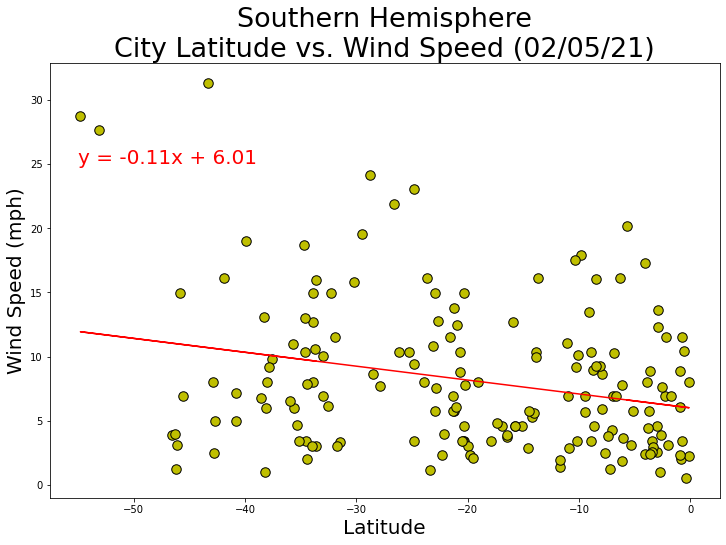

In [96]:
# create a scatter plot to show relationship between lattitude and wind speed in the southern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="y", edgecolor="k")

# plot regression line
plt.plot(x_value, regress_values, "r-")

# print equation in graph
plt.annotate(line_eq, (-55,25), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Wind Speed ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=20)

print(f"The r-value is: {rvalue}")

# save figure as a .png file
plt.savefig("../output_data/LinRegress8.png")

plt.show()

### Analysis of Latitude vs. Wind Speed broken up into the northern and southern hemispheres.
- The graph for the northern hemisphere shows a very weak correlation between a city’s latitude and their wind speeds. The r-value for this data set is .013 which confirms there is almost no relationship between our data points.
-The graph for the also does not show much of a correlation between the latitude and the wind speed, however, is does appear to be stronger than the northern hemisphere. The r-value of -.26 confirms this relationship.